In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab/susi

/content/drive/MyDrive/Colab/susi


In [3]:
%run prepare_images_collapse.py datasets/collapse

Copied images from datasets/collapse/0
Copied images from datasets/collapse/1


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize
import glob
import cv2
import re

print(tf.__version__)

train_dir = 'target_datasets_collapse/train'
val_dir = 'target_datasets_collapse/val'

backup_dir = './model_collapse'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.7.0
class number=2
['0', '1']


In [5]:

train_dir_2 = 'target_datasets_collapse/train2'

if os.path.exists(train_dir_2):
    shutil.rmtree(train_dir_2)
shutil.copytree('target_datasets_collapse/train', 'target_datasets_collapse/train2')



datagen = ImageDataGenerator(
        rotation_range=70,
        )

'''
 width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=(0.8, 1.5),
        fill_mode='nearest'
'''

          # 探す先のディレクトリ

### 探すファイルを指定する文字列
### os.path.join()は、カンマ(,)で区切られた文字列を'/'（または'\'）で結合し、パスを構成する。
### この例では 'data/*.txt' というパスがpatternに格納される。
### '*'はワイルドカード（任意の文字列）である。
### すなわち、これは「'data/'の中にある'.txt'で終わるファイルを全部探す」ことを意図している。
pattern0 = os.path.join(train_dir_2,'*')
pattern = os.path.join(pattern0,'*.jpg')


file_paths = glob.glob(pattern)     # patternにマッチする全てのファイルのパスをfile_pathsに格納する。

print(file_paths)

for file_path in file_paths:
  i = 0
  print(file_path)
  s=file_path
  s=re.sub('/[^/]*.jpg', '',s)
  s=s.replace('train2','train')
  print(s)


  img_array = cv2.imread(file_path,)  # 画像読み込み
  img_RGB = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_RGB.reshape((1,) + img_RGB.shape)  # 4次元データに変換（flow()に渡すため）

  for batch in datagen.flow(
    img_array, batch_size=1, shuffle=True,save_prefix='IMG',save_to_dir=s, save_format='jpg'):

      i += 1
      if i == 3:
          break  # 停止しないと無限ループ


['target_datasets_collapse/train2/0/S__116277270.jpg', 'target_datasets_collapse/train2/0/S__116277400.jpg', 'target_datasets_collapse/train2/0/S__116277280.jpg', 'target_datasets_collapse/train2/0/S__116277529.jpg', 'target_datasets_collapse/train2/0/S__116408407.jpg', 'target_datasets_collapse/train2/0/S__116408405.jpg', 'target_datasets_collapse/train2/0/S__116408397.jpg', 'target_datasets_collapse/train2/0/S__116277468.jpg', 'target_datasets_collapse/train2/0/S__116277686.jpg', 'target_datasets_collapse/train2/0/S__116408338.jpg', 'target_datasets_collapse/train2/0/S__116277302.jpg', 'target_datasets_collapse/train2/0/S__116277610.jpg', 'target_datasets_collapse/train2/0/S__116277303.jpg', 'target_datasets_collapse/train2/0/S__116277474.jpg', 'target_datasets_collapse/train2/0/S__116277522.jpg', 'target_datasets_collapse/train2/0/S__116277515.jpg', 'target_datasets_collapse/train2/0/S__116277473.jpg', 'target_datasets_collapse/train2/0/S__116277283.jpg', 'target_datasets_collapse/t

Found 845 images belonging to 2 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 54 images belonging to 2 classes.
## Train Data Sample ##


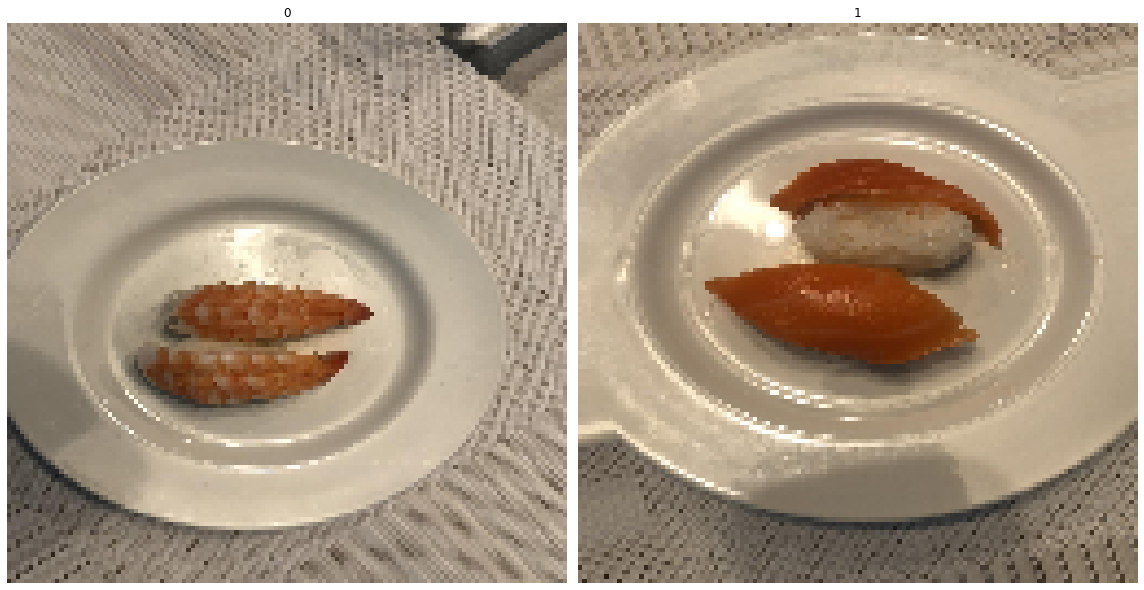

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 8)       224       
                                                                 
 activation_8 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_9 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                  

In [13]:
# 学習率
LEARNING_RATE =0.0015
# エポック（世代数）
EPOCHS = 16
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 128

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180,width_shift_range=0.2,height_shift_range=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

print(type(train_data))


validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
#model.add(Conv2D(8, (3, 3)))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dense(512))
#model.add(Activation('relu'))
model.add(Dropout(0.55))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Prediction data
[[1.    0.   ]
 [1.    0.   ]
 [0.015 0.985]
 [0.998 0.002]
 [1.    0.   ]
 [0.99  0.01 ]
 [0.359 0.641]
 [0.998 0.002]
 [1.    0.   ]
 [0.011 0.989]
 [0.028 0.972]
 [0.894 0.106]
 [0.994 0.006]
 [0.977 0.023]
 [1.    0.   ]
 [0.989 0.011]
 [1.    0.   ]
 [0.976 0.024]
 [0.358 0.642]
 [0.003 0.997]
 [0.999 0.001]
 [0.997 0.003]
 [0.001 0.999]
 [0.935 0.065]
 [1.    0.   ]
 [0.93  0.07 ]
 [0.963 0.037]
 [0.999 0.001]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.01  0.99 ]
 [0.    1.   ]
 [1.    0.   ]
 [0.097 0.903]
 [0.997 0.003]
 [0.101 0.899]
 [0.001 0.999]
 [0.009 0.991]
 [0.    1.   ]
 [0.    1.   ]
 [0.899 0.101]
 [1.    0.   ]
 [0.009 0.991]
 [1.    0.   ]
 [0.    1.   ]
 [0.034 0.966]
 [0.001 0.999]
 [0.495 0.505]
 [0.    1.   ]
 [0.465 0.535]
 [0.684 0.316]
 [0.001 0.999]
 [0.077 0.923]]
(54, 2)
#0 Expected:0 -> Predicted:0
File: 0/S__116277272.jpg
Each Prediction Value: [1. 0.]
* Correct *
#1 Expected:0 -> Predicted:0
File: 0/S__116277281.jpg
Each Predictio

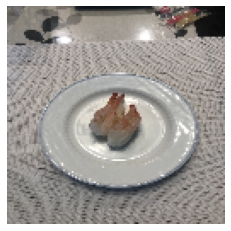

#3 Expected:0 -> Predicted:0
File: 0/S__116277300.jpg
Each Prediction Value: [0.998 0.002]
* Correct *
#4 Expected:0 -> Predicted:0
File: 0/S__116277310.jpg
Each Prediction Value: [1. 0.]
* Correct *
#5 Expected:0 -> Predicted:0
File: 0/S__116277315.jpg
Each Prediction Value: [0.99 0.01]
* Correct *
#6 Expected:0 -> Predicted:1
File: 0/S__116277371.jpg
Each Prediction Value: [0.359 0.641]
**** INCORRECT ****


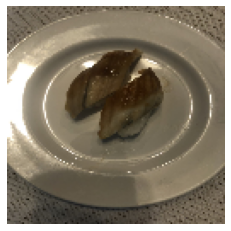

#7 Expected:0 -> Predicted:0
File: 0/S__116277380.jpg
Each Prediction Value: [0.998 0.002]
* Correct *
#8 Expected:0 -> Predicted:0
File: 0/S__116277398.jpg
Each Prediction Value: [1. 0.]
* Correct *
#9 Expected:0 -> Predicted:1
File: 0/S__116277401.jpg
Each Prediction Value: [0.011 0.989]
**** INCORRECT ****


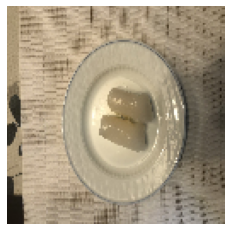

#10 Expected:0 -> Predicted:1
File: 0/S__116277426.jpg
Each Prediction Value: [0.028 0.972]
**** INCORRECT ****


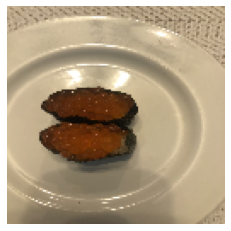

#11 Expected:0 -> Predicted:0
File: 0/S__116277445.jpg
Each Prediction Value: [0.894 0.106]
* Correct *
#12 Expected:0 -> Predicted:0
File: 0/S__116277458.jpg
Each Prediction Value: [0.994 0.006]
* Correct *
#13 Expected:0 -> Predicted:0
File: 0/S__116277500.jpg
Each Prediction Value: [0.977 0.023]
* Correct *
#14 Expected:0 -> Predicted:0
File: 0/S__116277578.jpg
Each Prediction Value: [1. 0.]
* Correct *
#15 Expected:0 -> Predicted:0
File: 0/S__116277624.jpg
Each Prediction Value: [0.989 0.011]
* Correct *
#16 Expected:0 -> Predicted:0
File: 0/S__116277666.jpg
Each Prediction Value: [1. 0.]
* Correct *
#17 Expected:0 -> Predicted:0
File: 0/S__116277693.jpg
Each Prediction Value: [0.976 0.024]
* Correct *
#18 Expected:0 -> Predicted:1
File: 0/S__116408332.jpg
Each Prediction Value: [0.358 0.642]
**** INCORRECT ****


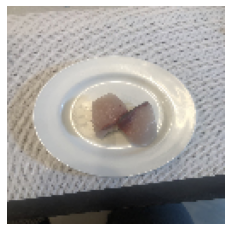

#19 Expected:0 -> Predicted:1
File: 0/S__116408333.jpg
Each Prediction Value: [0.003 0.997]
**** INCORRECT ****


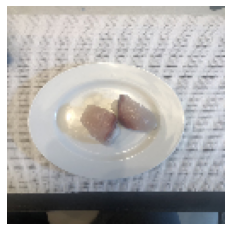

#20 Expected:0 -> Predicted:0
File: 0/S__116408351.jpg
Each Prediction Value: [0.999 0.001]
* Correct *
#21 Expected:0 -> Predicted:0
File: 0/S__116408368.jpg
Each Prediction Value: [0.997 0.003]
* Correct *
#22 Expected:0 -> Predicted:1
File: 0/S__116408370.jpg
Each Prediction Value: [0.001 0.999]
**** INCORRECT ****


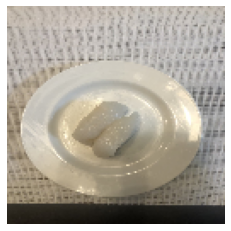

#23 Expected:0 -> Predicted:0
File: 0/S__116408376.jpg
Each Prediction Value: [0.935 0.065]
* Correct *
#24 Expected:0 -> Predicted:0
File: 0/S__116408381.jpg
Each Prediction Value: [1. 0.]
* Correct *
#25 Expected:0 -> Predicted:0
File: 0/S__116408392.jpg
Each Prediction Value: [0.93 0.07]
* Correct *
#26 Expected:0 -> Predicted:0
File: 0/S__116408399.jpg
Each Prediction Value: [0.963 0.037]
* Correct *
#27 Expected:0 -> Predicted:0
File: 0/S__116408414.jpg
Each Prediction Value: [0.999 0.001]
* Correct *
#28 Expected:1 -> Predicted:0
File: 1/S__116277279.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


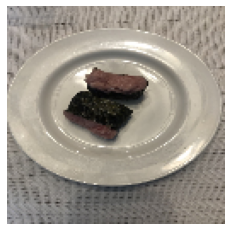

#29 Expected:1 -> Predicted:0
File: 1/S__116277284.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


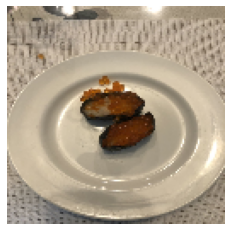

#30 Expected:1 -> Predicted:0
File: 1/S__116277314.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


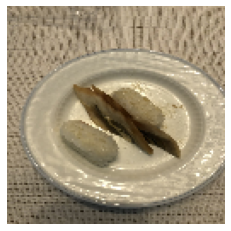

#31 Expected:1 -> Predicted:1
File: 1/S__116277317.jpg
Each Prediction Value: [0.01 0.99]
* Correct *
#32 Expected:1 -> Predicted:1
File: 1/S__116277410.jpg
Each Prediction Value: [0. 1.]
* Correct *
#33 Expected:1 -> Predicted:0
File: 1/S__116277438.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


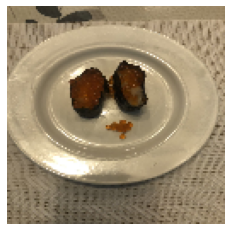

#34 Expected:1 -> Predicted:1
File: 1/S__116277440.jpg
Each Prediction Value: [0.097 0.903]
* Correct *
#35 Expected:1 -> Predicted:0
File: 1/S__116277441.jpg
Each Prediction Value: [0.997 0.003]
**** INCORRECT ****


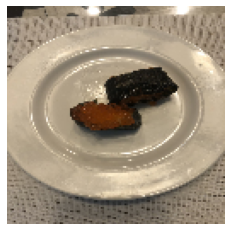

#36 Expected:1 -> Predicted:1
File: 1/S__116277467.jpg
Each Prediction Value: [0.101 0.899]
* Correct *
#37 Expected:1 -> Predicted:1
File: 1/S__116277475.jpg
Each Prediction Value: [0.001 0.999]
* Correct *
#38 Expected:1 -> Predicted:1
File: 1/S__116277491.jpg
Each Prediction Value: [0.009 0.991]
* Correct *
#39 Expected:1 -> Predicted:1
File: 1/S__116277510.jpg
Each Prediction Value: [0. 1.]
* Correct *
#40 Expected:1 -> Predicted:1
File: 1/S__116277526.jpg
Each Prediction Value: [0. 1.]
* Correct *
#41 Expected:1 -> Predicted:0
File: 1/S__116277557.jpg
Each Prediction Value: [0.899 0.101]
**** INCORRECT ****


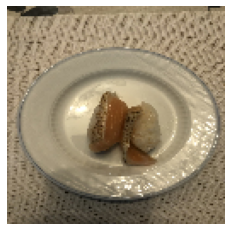

#42 Expected:1 -> Predicted:0
File: 1/S__116277558.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


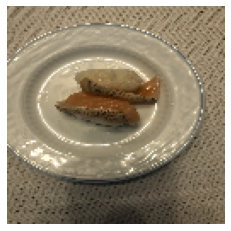

#43 Expected:1 -> Predicted:1
File: 1/S__116277568.jpg
Each Prediction Value: [0.009 0.991]
* Correct *
#44 Expected:1 -> Predicted:0
File: 1/S__116277569.jpg
Each Prediction Value: [1. 0.]
**** INCORRECT ****


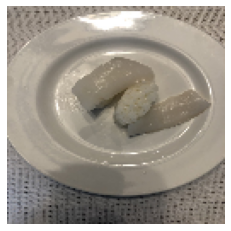

#45 Expected:1 -> Predicted:1
File: 1/S__116277651.jpg
Each Prediction Value: [0. 1.]
* Correct *
#46 Expected:1 -> Predicted:1
File: 1/S__116408340.jpg
Each Prediction Value: [0.034 0.966]
* Correct *
#47 Expected:1 -> Predicted:1
File: 1/S__116408348.jpg
Each Prediction Value: [0.001 0.999]
* Correct *
#48 Expected:1 -> Predicted:1
File: 1/S__116408377.jpg
Each Prediction Value: [0.495 0.505]
* Correct *
#49 Expected:1 -> Predicted:1
File: 1/S__116408382.jpg
Each Prediction Value: [0. 1.]
* Correct *
#50 Expected:1 -> Predicted:1
File: 1/S__116408409.jpg
Each Prediction Value: [0.465 0.535]
* Correct *
#51 Expected:1 -> Predicted:0
File: 1/S__116408420.jpg
Each Prediction Value: [0.684 0.316]
**** INCORRECT ****


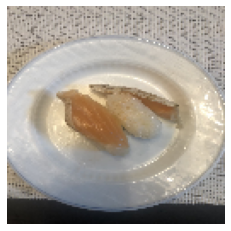

#52 Expected:1 -> Predicted:1
File: 1/S__116408427.jpg
Each Prediction Value: [0.001 0.999]
* Correct *
#53 Expected:1 -> Predicted:1
File: 1/S__116408430.jpg
Each Prediction Value: [0.077 0.923]
* Correct *
Loss


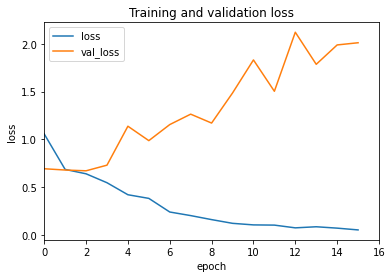

Accuracy


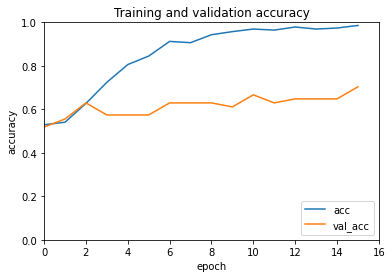

Confusion Matrix


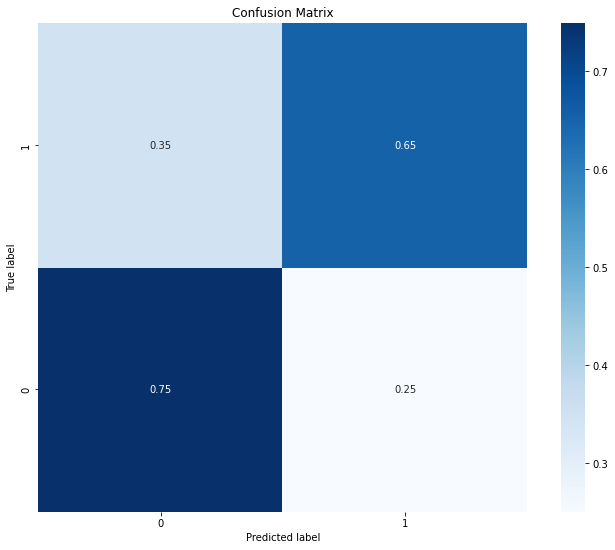

In [14]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


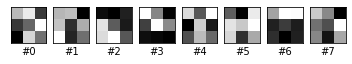

Visualize filter: conv2d_1


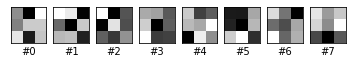

In [8]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [9]:
!cat incorrect.txt

target_datasets_collapse/val/0/S__116277291.jpg
target_datasets_collapse/val/0/S__116277371.jpg
target_datasets_collapse/val/0/S__116277426.jpg
target_datasets_collapse/val/0/S__116277458.jpg
target_datasets_collapse/val/0/S__116277666.jpg
target_datasets_collapse/val/0/S__116408392.jpg
target_datasets_collapse/val/1/S__116277279.jpg
target_datasets_collapse/val/1/S__116277284.jpg
target_datasets_collapse/val/1/S__116277314.jpg
target_datasets_collapse/val/1/S__116277317.jpg
target_datasets_collapse/val/1/S__116277438.jpg
target_datasets_collapse/val/1/S__116277441.jpg
target_datasets_collapse/val/1/S__116277475.jpg
target_datasets_collapse/val/1/S__116277526.jpg
target_datasets_collapse/val/1/S__116277558.jpg
target_datasets_collapse/val/1/S__116277568.jpg
target_datasets_collapse/val/1/S__116277569.jpg
target_datasets_collapse/val/1/S__116408340.jpg
target_datasets_collapse/val/1/S__116408348.jpg
target_datasets_collapse/val/1/S__116408377.jpg
target_datasets_collapse/val/1/S__116408

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                    

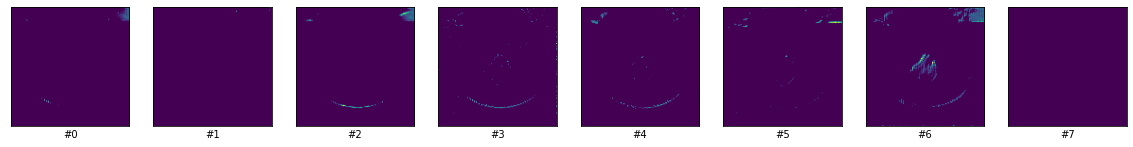

target_datasets_collapse/val/0/S__116277371.jpg


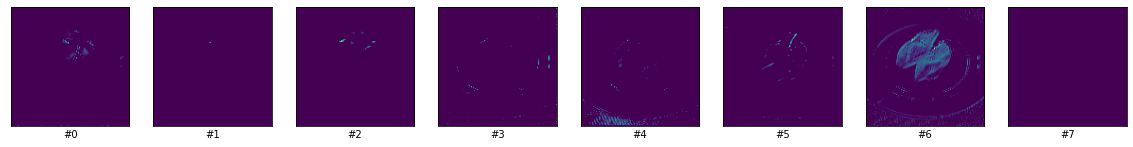

target_datasets_collapse/val/0/S__116277426.jpg


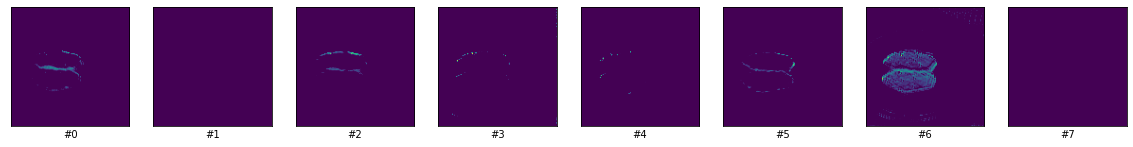

target_datasets_collapse/val/0/S__116277458.jpg


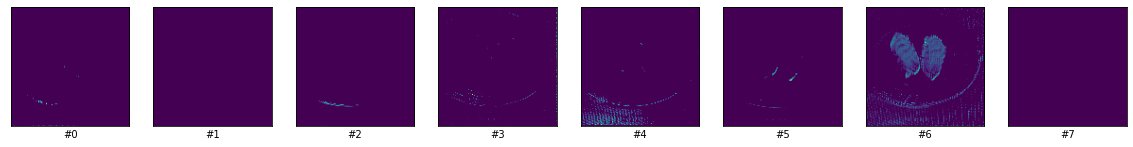

target_datasets_collapse/val/0/S__116277666.jpg


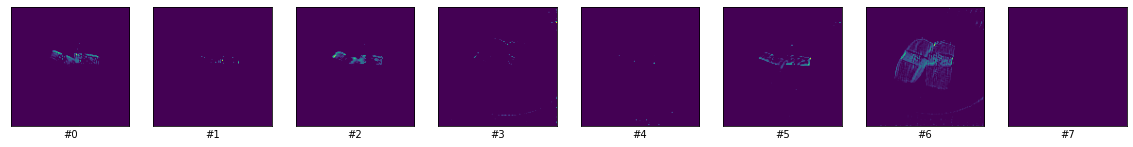

target_datasets_collapse/val/0/S__116408392.jpg


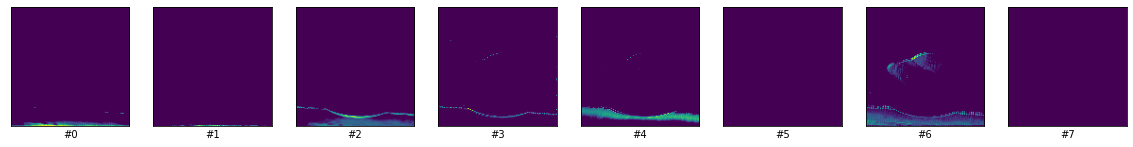

target_datasets_collapse/val/1/S__116277279.jpg


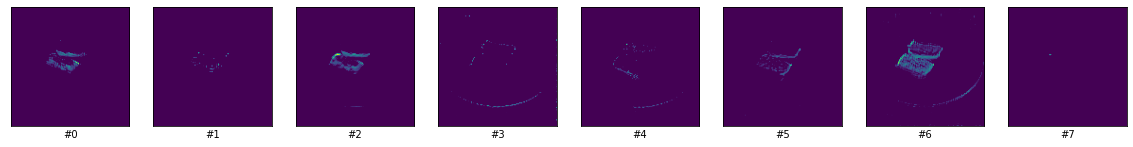

target_datasets_collapse/val/1/S__116277284.jpg


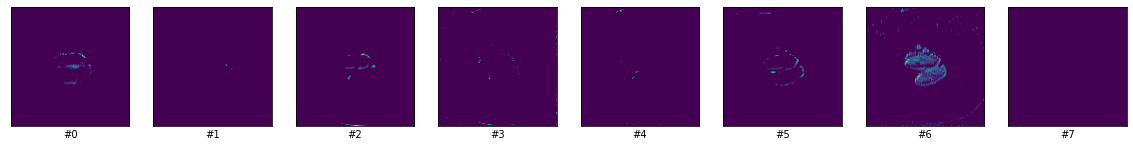

target_datasets_collapse/val/1/S__116277314.jpg


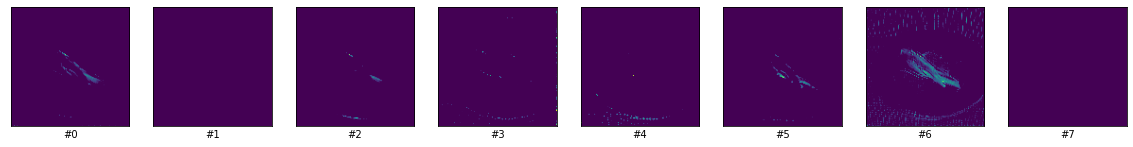

target_datasets_collapse/val/1/S__116277317.jpg


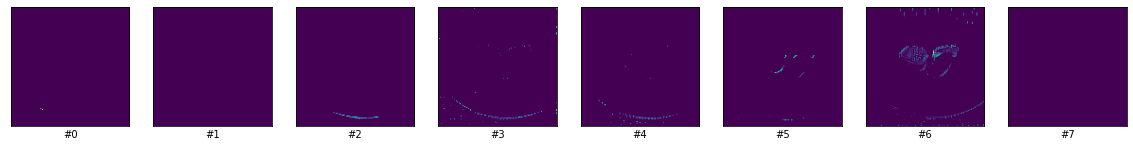

target_datasets_collapse/val/1/S__116277438.jpg


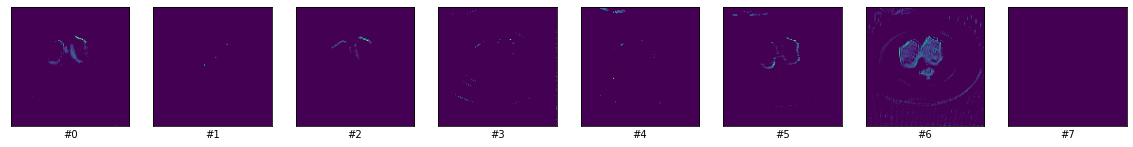

target_datasets_collapse/val/1/S__116277441.jpg


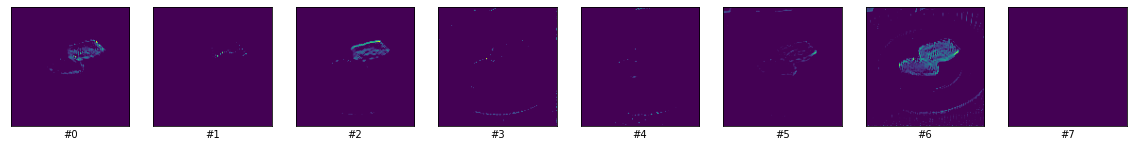

target_datasets_collapse/val/1/S__116277475.jpg


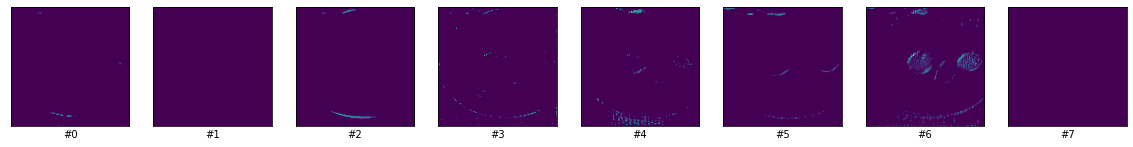

target_datasets_collapse/val/1/S__116277526.jpg


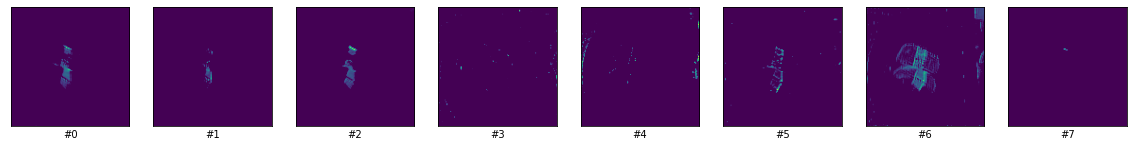

target_datasets_collapse/val/1/S__116277558.jpg


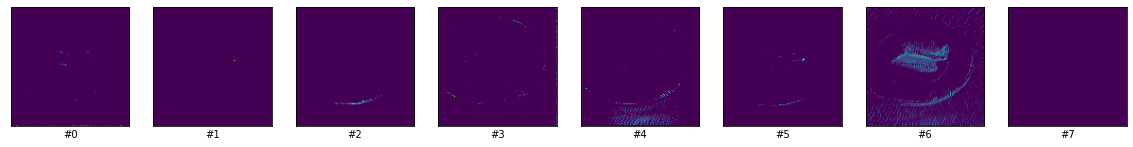

target_datasets_collapse/val/1/S__116277568.jpg


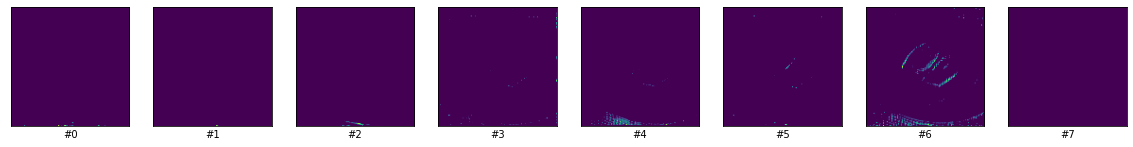

target_datasets_collapse/val/1/S__116277569.jpg


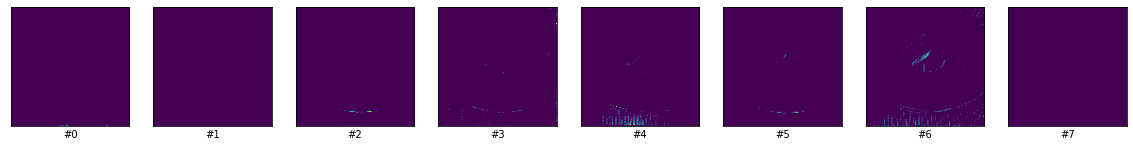

target_datasets_collapse/val/1/S__116408340.jpg


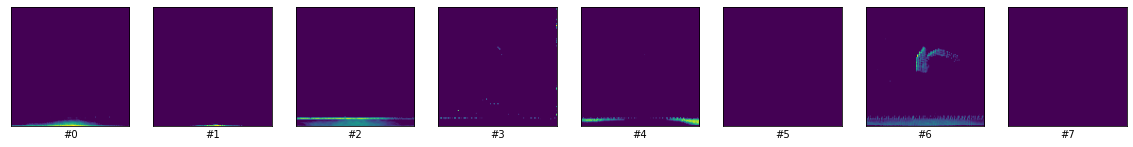

target_datasets_collapse/val/1/S__116408348.jpg


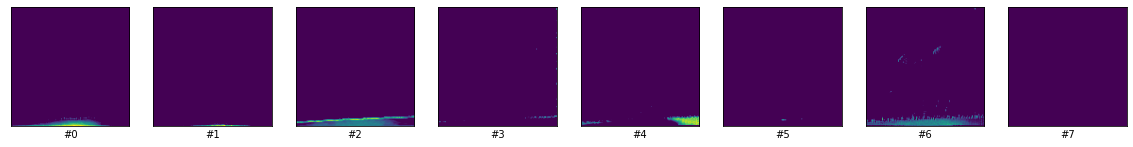

target_datasets_collapse/val/1/S__116408377.jpg


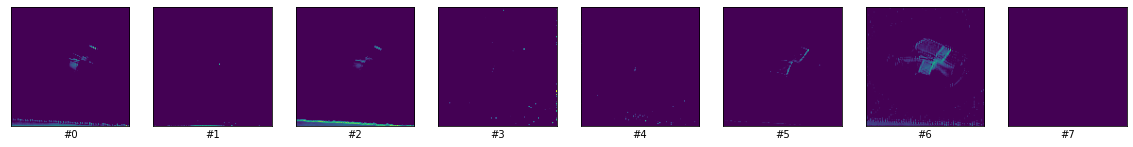

target_datasets_collapse/val/1/S__116408427.jpg


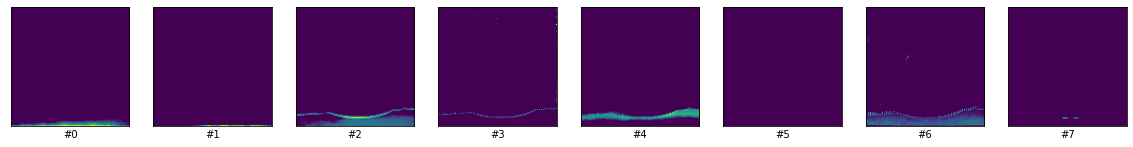

target_datasets_collapse/val/1/S__116408430.jpg


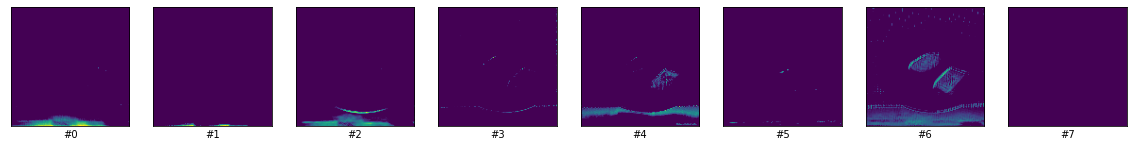

In [10]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)

In [11]:
save_model_path2 = os.path.join('model_collapse', 'cp-1.ckpt')
model.save_weights(save_model_path2)

save_model_path_3 = os.path.join('model_collapse', 'cp-2.ckpt')
model.save(save_model_path_3)

INFO:tensorflow:Assets written to: model_collapse/cp-2.ckpt/assets
